# Install Library

In [34]:
import pandas as pd
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVR
from sklearn.metrics import r2_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error
from pyswarm import pso
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Data Collection

## Read Data

In [35]:
data_train = pd.read_csv('D:/Data_Training.csv')
X_train = data_train.iloc[:,[2,3,4]]
y_train = data_train.iloc[:,6]

data_test = pd.read_csv('D:/Data_Testing')
X_test = data_test.iloc[:,[2,3,4]] 
y_test = data_test.iloc[:,6]        

## Scalling Data

In [36]:
x_scaler = preprocessing.MinMaxScaler().fit(X_train)
y_scaler = preprocessing.MinMaxScaler()
X_train = x_scaler.transform(X_train)
X_test = x_scaler.transform(X_test)

## Drop Data

In [37]:
data_train = data_test.drop(['Time Stamp'] , axis=1)
data_test = data_test.drop(['Time Stamp'] , axis=1)

## Data Information

In [121]:
print("Training Data Info:")
print(data_train)
print("\nTesting Data Info:")
print(data_test)

Training Data Info:
       Timestep   Voltage   Current  Temperature  Capacity       SoC
0             0  4.167788 -0.064187     0.762547 -0.000009  0.999996
1             1  4.162834 -0.066555     0.760284 -0.000027  0.999988
2             2  4.161546 -0.066636     0.754623 -0.000047  0.999980
3             3  4.160906 -0.066960     0.763681 -0.000064  0.999972
4             4  4.160650 -0.066879     0.805564 -0.000083  0.999964
...         ...       ...       ...          ...       ...       ...
85725     12103  3.095360  0.000000    26.471310 -2.798170  0.000000
85726     12104  3.095233  0.000000    26.471310 -2.798170  0.000000
85727     12105  3.095296  0.000000    26.472431 -2.798170  0.000000
85728     12106  3.095537  0.000000    26.475386 -2.798170  0.000000
85729     12107  3.095360  0.000000    26.482520 -2.798170  0.000000

[85730 rows x 6 columns]

Testing Data Info:
        Timestep   Voltage   Current  Temperature  Capacity       SoC
0              0  4.167916 -0.064349

# Description Data

In [126]:
print("\nTraining Data Description:")
print(data_train.describe())
print()
print("\nTesting Data Description:")
print(data_test.describe())


Training Data Description:
           Timestep       Voltage       Current   Temperature      Capacity  \
count  85730.000000  85730.000000  85730.000000  85730.000000  85730.000000   
mean    4906.805144      3.627439     -0.945160     15.686512     -1.283174   
std     2973.823305      0.291241      1.859015      9.723446      0.762049   
min        0.000000      2.493172    -18.341281      0.324454     -2.798170   
25%     2381.000000      3.451147     -1.752468      6.503343     -1.921396   
50%     4762.000000      3.642030     -0.573755     12.706477     -1.248227   
75%     7254.000000      3.845731     -0.068108     26.364835     -0.636627   
max    12107.000000      4.204251      9.524260     29.437008     -0.000009   

                SoC  
count  85730.000000  
mean       0.491943  
std        0.297540  
min        0.000000  
25%        0.228713  
50%        0.507598  
75%        0.743329  
max        0.999996  


Testing Data Description:
            Timestep        Voltag

# Visualize Data

## Voltage Distribusi 

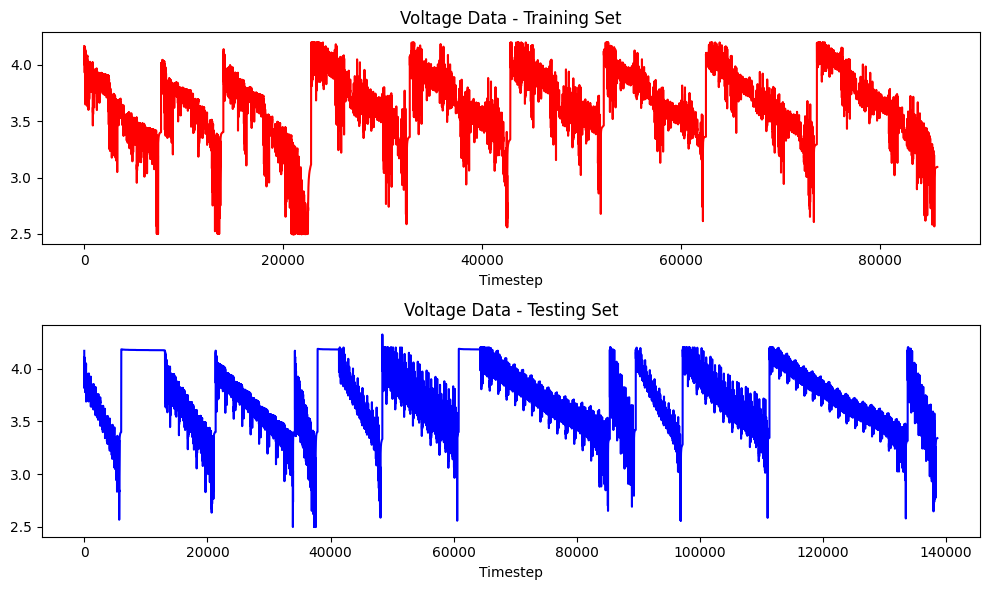

In [98]:
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1) 
plt.plot(data_train["Voltage"], 'r')
plt.xlabel('Timestep')
plt.title("Voltage Data - Training Set")
plt.subplot(2, 1, 2) 
plt.plot(data_test["Voltage"], 'b')
plt.xlabel('Timestep')
plt.title("Voltage Data - Testing Set")
plt.tight_layout() 
plt.show()


## Current Distribution

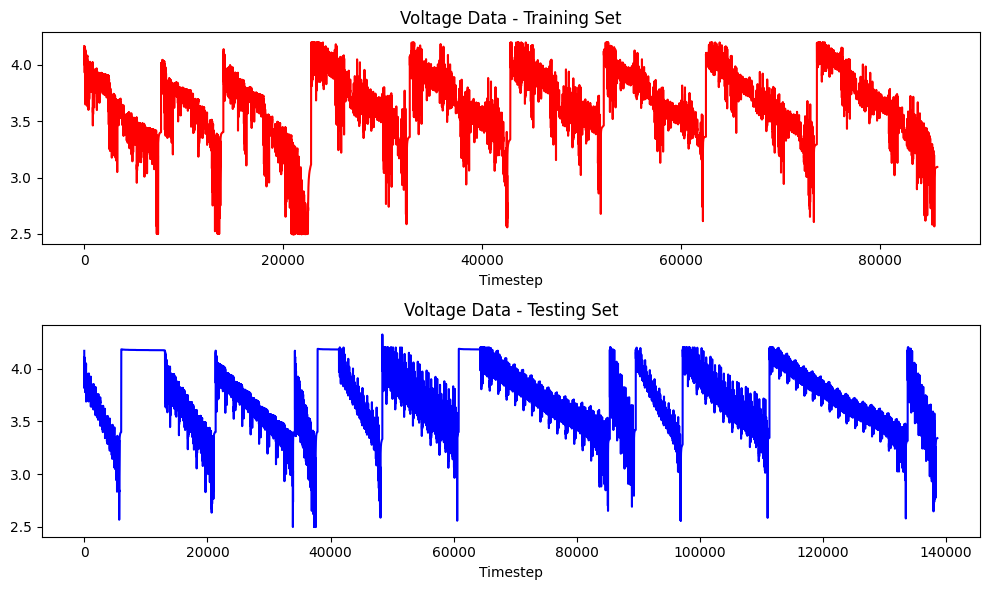

In [99]:
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1) 
plt.plot(data_train["Voltage"], 'r')
plt.xlabel('Timestep')
plt.title("Voltage Data - Training Set")
plt.subplot(2, 1, 2) 
plt.plot(data_test["Voltage"], 'b')
plt.xlabel('Timestep')
plt.title("Voltage Data - Testing Set")
plt.tight_layout()
plt.show()

## Temperature Distribution

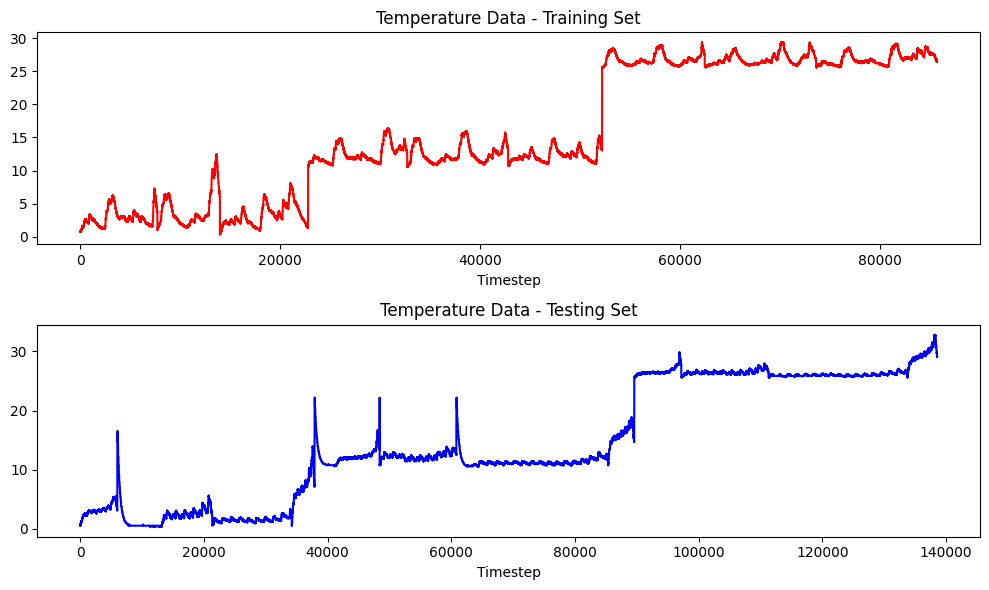

In [102]:
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(data_train["Temperature"], 'r')
plt.xlabel('Timestep')
plt.title("Temperature Data - Training Set")
plt.subplot(2, 1, 2) 
plt.plot(data_test["Temperature"], 'b')
plt.xlabel('Timestep')
plt.title("Temperature Data - Testing Set")
plt.tight_layout() 
plt.show()

## SoC Distribution

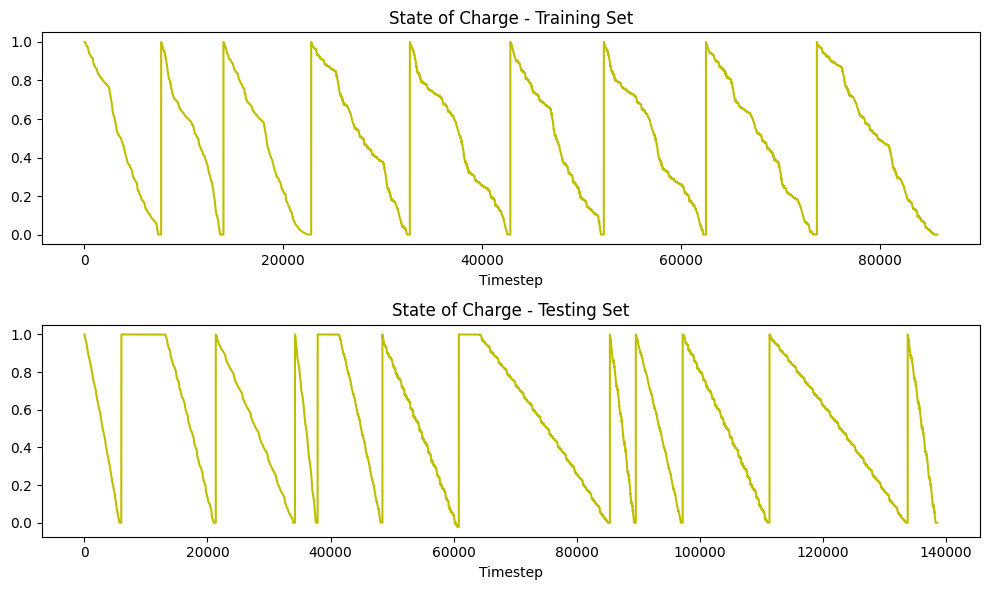

In [105]:
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1) 
plt.plot(data_train["SoC"], 'y')
plt.xlabel('Timestep')
plt.title("State of Charge - Training Set")
plt.subplot(2, 1, 2) 
plt.plot(data_test["SoC"], 'y')
plt.xlabel('Timestep')
plt.title("State of Charge - Testing Set")
plt.tight_layout()
plt.show()


# Data Pre-processing

# Missing value

In [128]:
print("\nMissing Values in Training Data:")
print(data_train.isnull().sum())
print("\nMissing Values in Testing Data:")
print(data_test.isnull().sum())


Missing Values in Training Data:
Timestep       0
Voltage        0
Current        0
Temperature    0
Capacity       0
SoC            0
dtype: int64

Missing Values in Testing Data:
Timestep       0
Voltage        0
Current        0
Temperature    0
Capacity       0
SoC            0
dtype: int64


## Feature selection

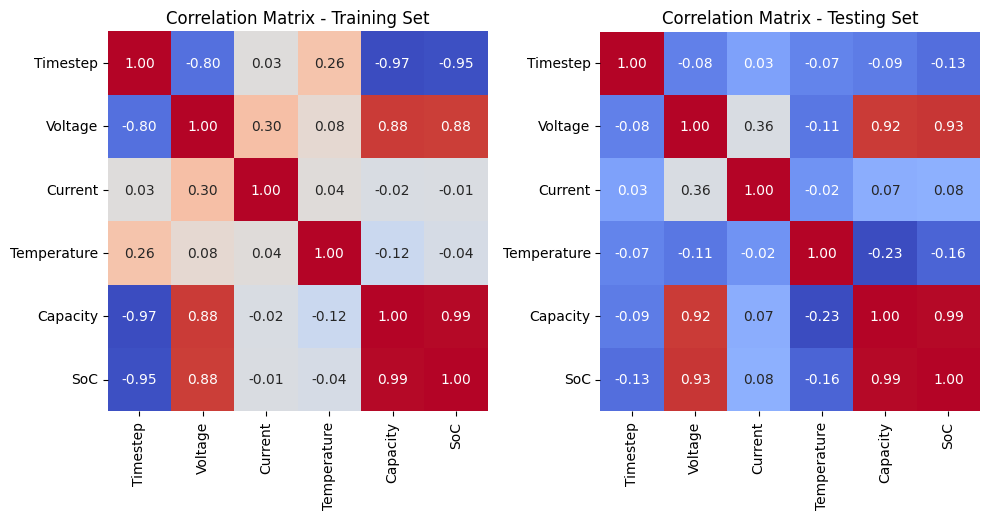

In [119]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute correlation matrices for both training and testing data
corr_matrix_train = data_train.corr()
corr_matrix_test = data_test.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))  # Larger figure size for better readability

# Plot heatmap for training data correlation matrix
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
sns.heatmap(corr_matrix_train, annot=True, fmt=".2f", cmap='coolwarm', cbar=False, square=True)
plt.title('Correlation Matrix - Training Set')

# Plot heatmap for testing data correlation matrix
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
sns.heatmap(corr_matrix_test, annot=True, fmt=".2f", cmap='coolwarm', cbar=False, square=True)
plt.title('Correlation Matrix - Testing Set')

# Show the plots
plt.tight_layout()  # Automatically adjusts subplot params for good fit
plt.show()


# Modelling

## Hyperparameter Optimization with dengan PSO

In [60]:
def objective_function(params):
    C, gamma = params
    svr = SVR(kernel='rbf', C=C, gamma=gamma)
    svr.fit(X_train, y_train)
    y_pred = svr.predict(X_test)
    score = -r2_score(y_test, y_pred)
    return score

lower_bound = [1, 0.1]
upper_bound = [100, 1.0]
best_params, _ = pso(objective_function, lower_bound, upper_bound, swarmsize=10, maxiter=5)
print("Best hyperparameters found using PSO:", best_params)

Stopping search: maximum iterations reached --> 5
Best hyperparameters found using PSO: [24.23878173  1.        ]


## SVM Model

In [ ]:
svr = SVR(kernel='rbf', C=best_params[0], gamma=best_params[1])
svr.fit(X_train, y_train)

## Valution with R2, RMSE, and MAE

In [63]:
y_pred = svr.predict(X_test)
r2 = round(r2_score(y_test, y_pred),3)
absolute = round(mean_absolute_error(y_test, y_pred),3)
rmse = round(root_mean_squared_error(y_test, y_pred),3)
print()
print("r2_score:", r2)
print()
print("mean_absolute_error:", absolute)
print()
print("root_mean_squared_error:", rmse)


r2_score: 0.978

mean_absolute_error: 0.039

root_mean_squared_error: 0.048


# Visualization of Model Results

## Regresion Plot

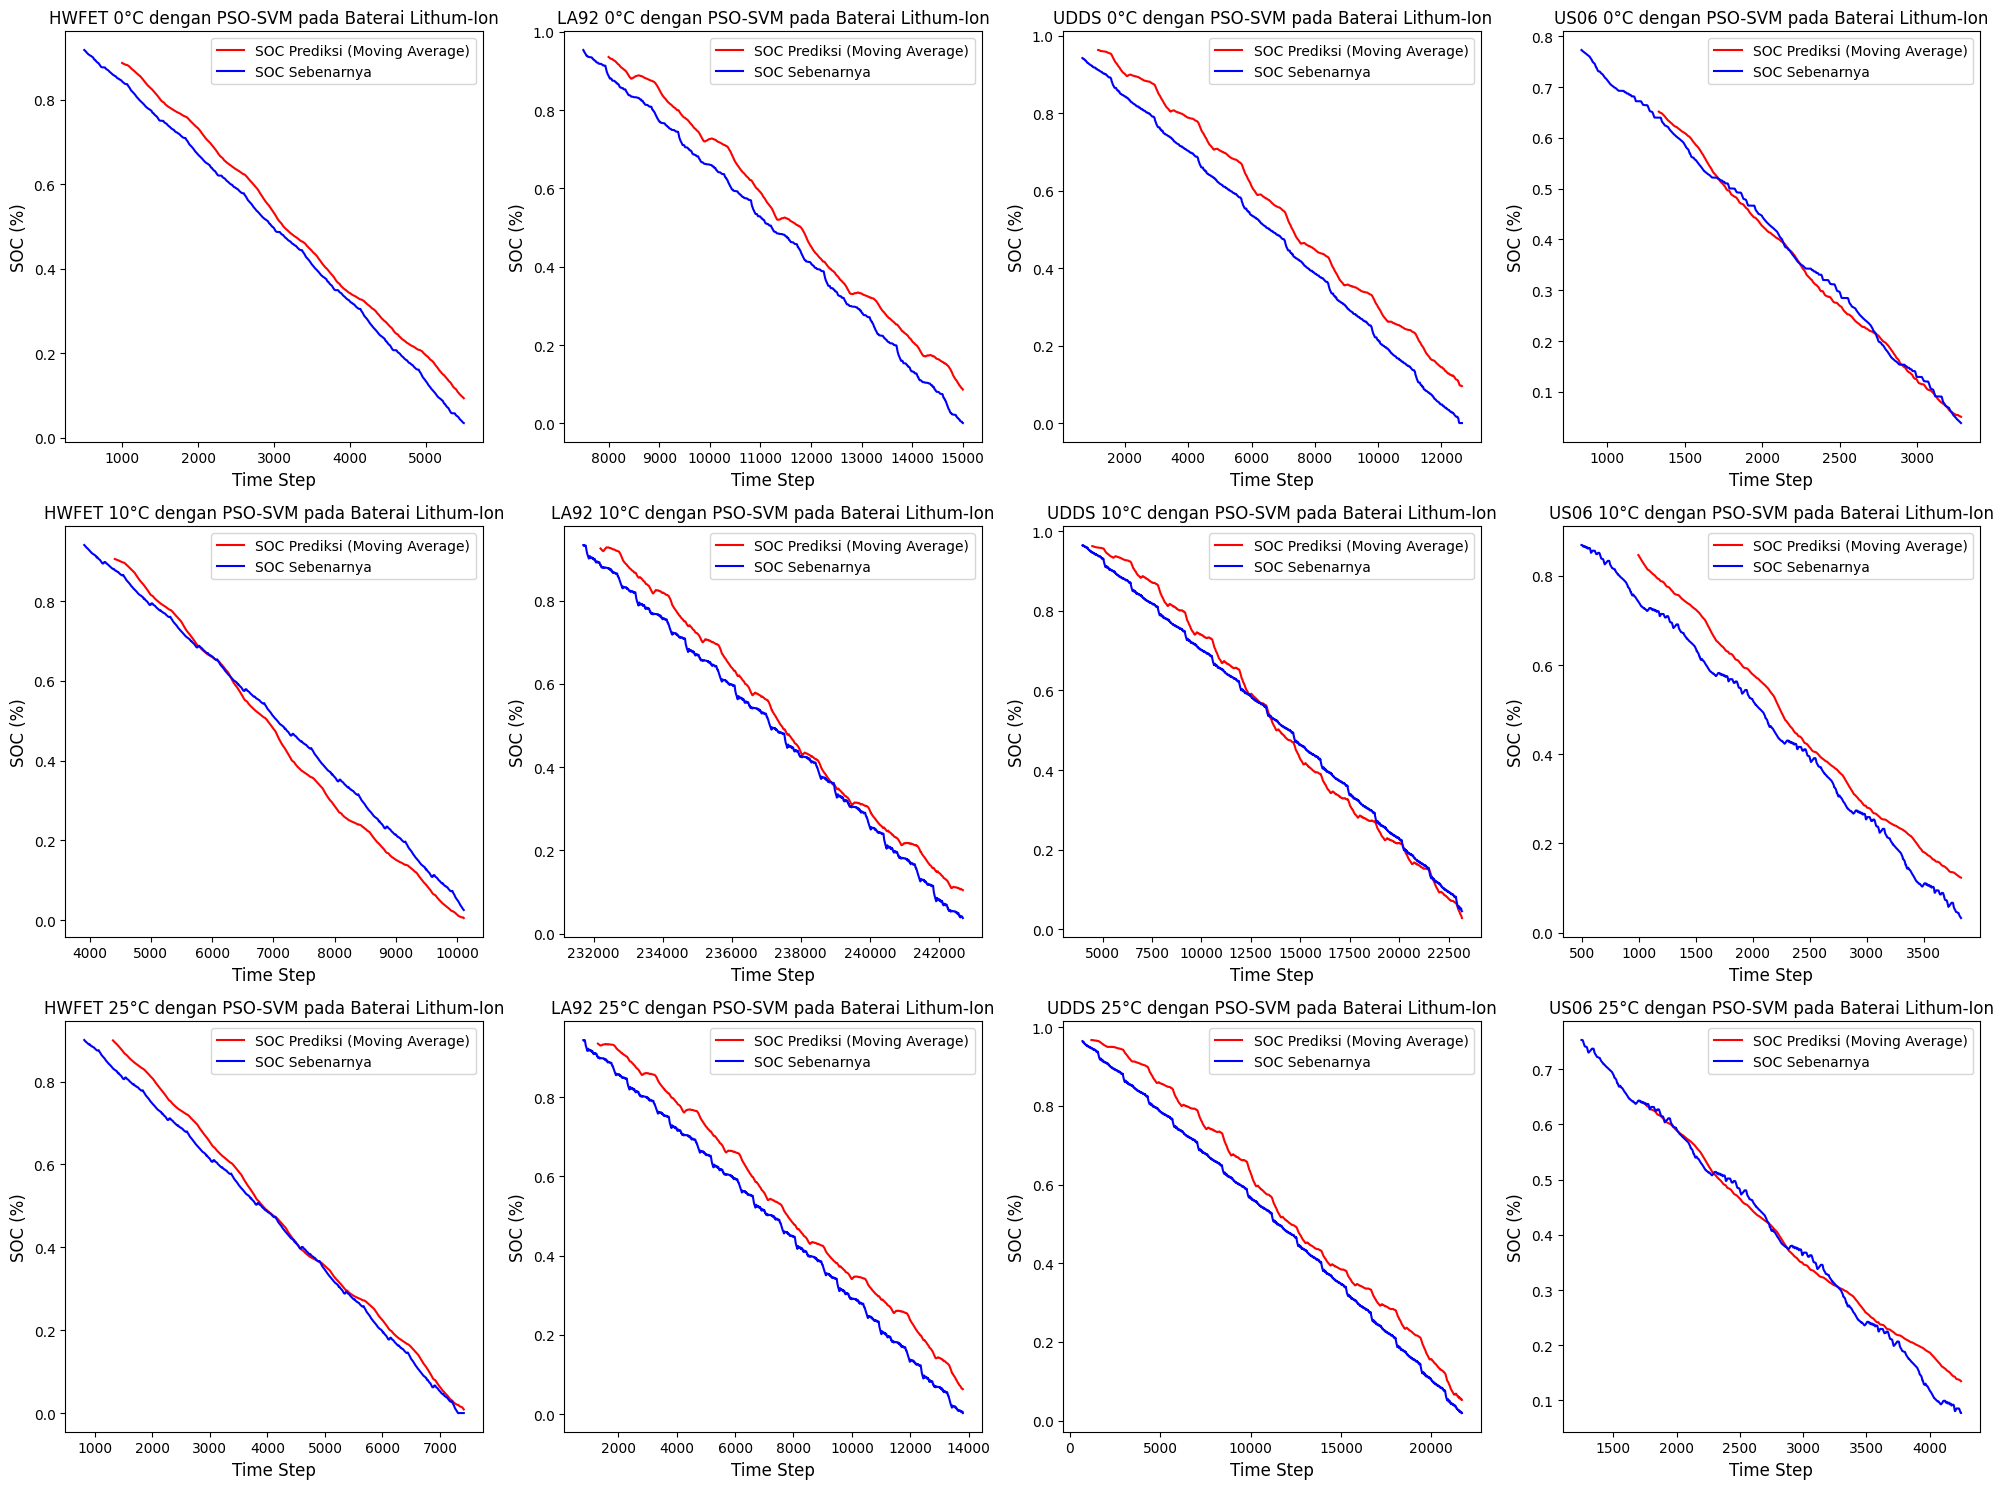

In [133]:
def plot_soc(timesteps, y_pred, y_test, ax, title):
    window_size = 500
    y_pred_moving_average = pd.Series(y_pred).rolling(window_size).mean()
    ax.plot(timesteps, y_pred_moving_average, label='SOC Prediksi (Moving Average)', color='red')
    ax.plot(timesteps, y_test, label='SOC Sebenarnya', color='blue')
    ax.set_xlabel('Time Step', size=12)
    ax.set_ylabel('SOC (%)', size=12)
    ax.set_title(title)
    ax.legend()
timesteps = data_test['Timestep']
fig, axs = plt.subplots(nrows=3, ncols=4, figsize=(20, 15))
plot_ranges = [
    (500, 5500, 'HWFET 0°C dengan PSO-SVM pada Baterai Lithum-Ion'),
    (13500, 21000, 'LA92 0°C dengan PSO-SVM pada Baterai Lithum-Ion'),
    (22000, 34000, 'UDDS 0°C dengan PSO-SVM pada Baterai Lithum-Ion'),
    (35050, 37500, 'US06 0°C dengan PSO-SVM pada Baterai Lithum-Ion'),
    (41800, 48000, 'HWFET 10°C dengan PSO-SVM pada Baterai Lithum-Ion'),
    (49000, 60000, 'LA92 10°C dengan PSO-SVM pada Baterai Lithum-Ion'),
    (64800, 84000, 'UDDS 10°C dengan PSO-SVM pada Baterai Lithum-Ion'),
    (85870, 89200, 'US06 10°C dengan PSO-SVM pada Baterai Lithum-Ion'),
    (90400, 97000, 'HWFET 25°C dengan PSO-SVM pada Baterai Lithum-Ion'),
    (98000, 111000, 'LA92 25°C dengan PSO-SVM pada Baterai Lithum-Ion'),
    (112000, 133000, 'UDDS 25°C dengan PSO-SVM pada Baterai Lithum-Ion'),
    (135000, 138000, 'US06 25°C dengan PSO-SVM pada Baterai Lithum-Ion')
]
for (start, end, title), ax in zip(plot_ranges, axs.ravel()):
    plot_soc(timesteps[start:end], y_pred[start:end], y_test[start:end], ax, title)
plt.tight_layout()
plt.show()

## Prediction Error Distribution

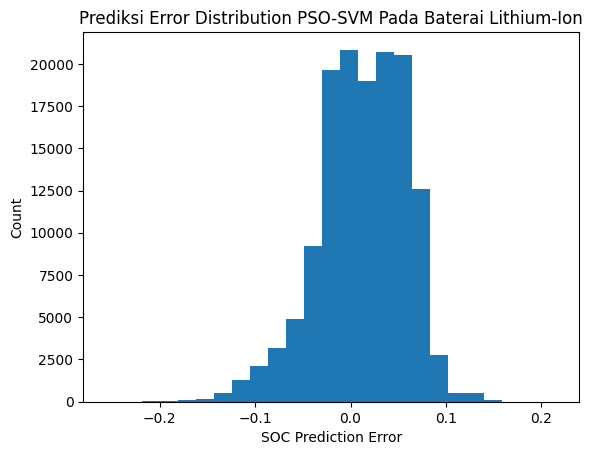

In [77]:
error_pred = y_pred - y_test.values.flatten()
plt.hist(error_pred, bins=25)
plt.xlabel('SOC Prediction Error')
plt.ylabel('Count')
plt.title('Prediksi Error Distribution PSO-SVM Pada Baterai Lithium-Ion')
plt.show()

# Save the Model

In [ ]:
results_df = pd.DataFrame({'Actual SoC': y_test, 'Predicted SoC': y_pred})
results_df.to_hdf('D:/Kuliah/Semester 8/Skripsi/pso_svm_ion.h5', key='df', mode='w')